In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
data = pd.read_csv("./dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [5]:
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age                                               0.0
International               

In [6]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


So there are 3 unique values in target column which we can replace by
* Dropout - 0
* Enrolled - 1
* Graduate - 2

In [7]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [8]:
print(data["Target"].unique())

[0 2 1]


In [9]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

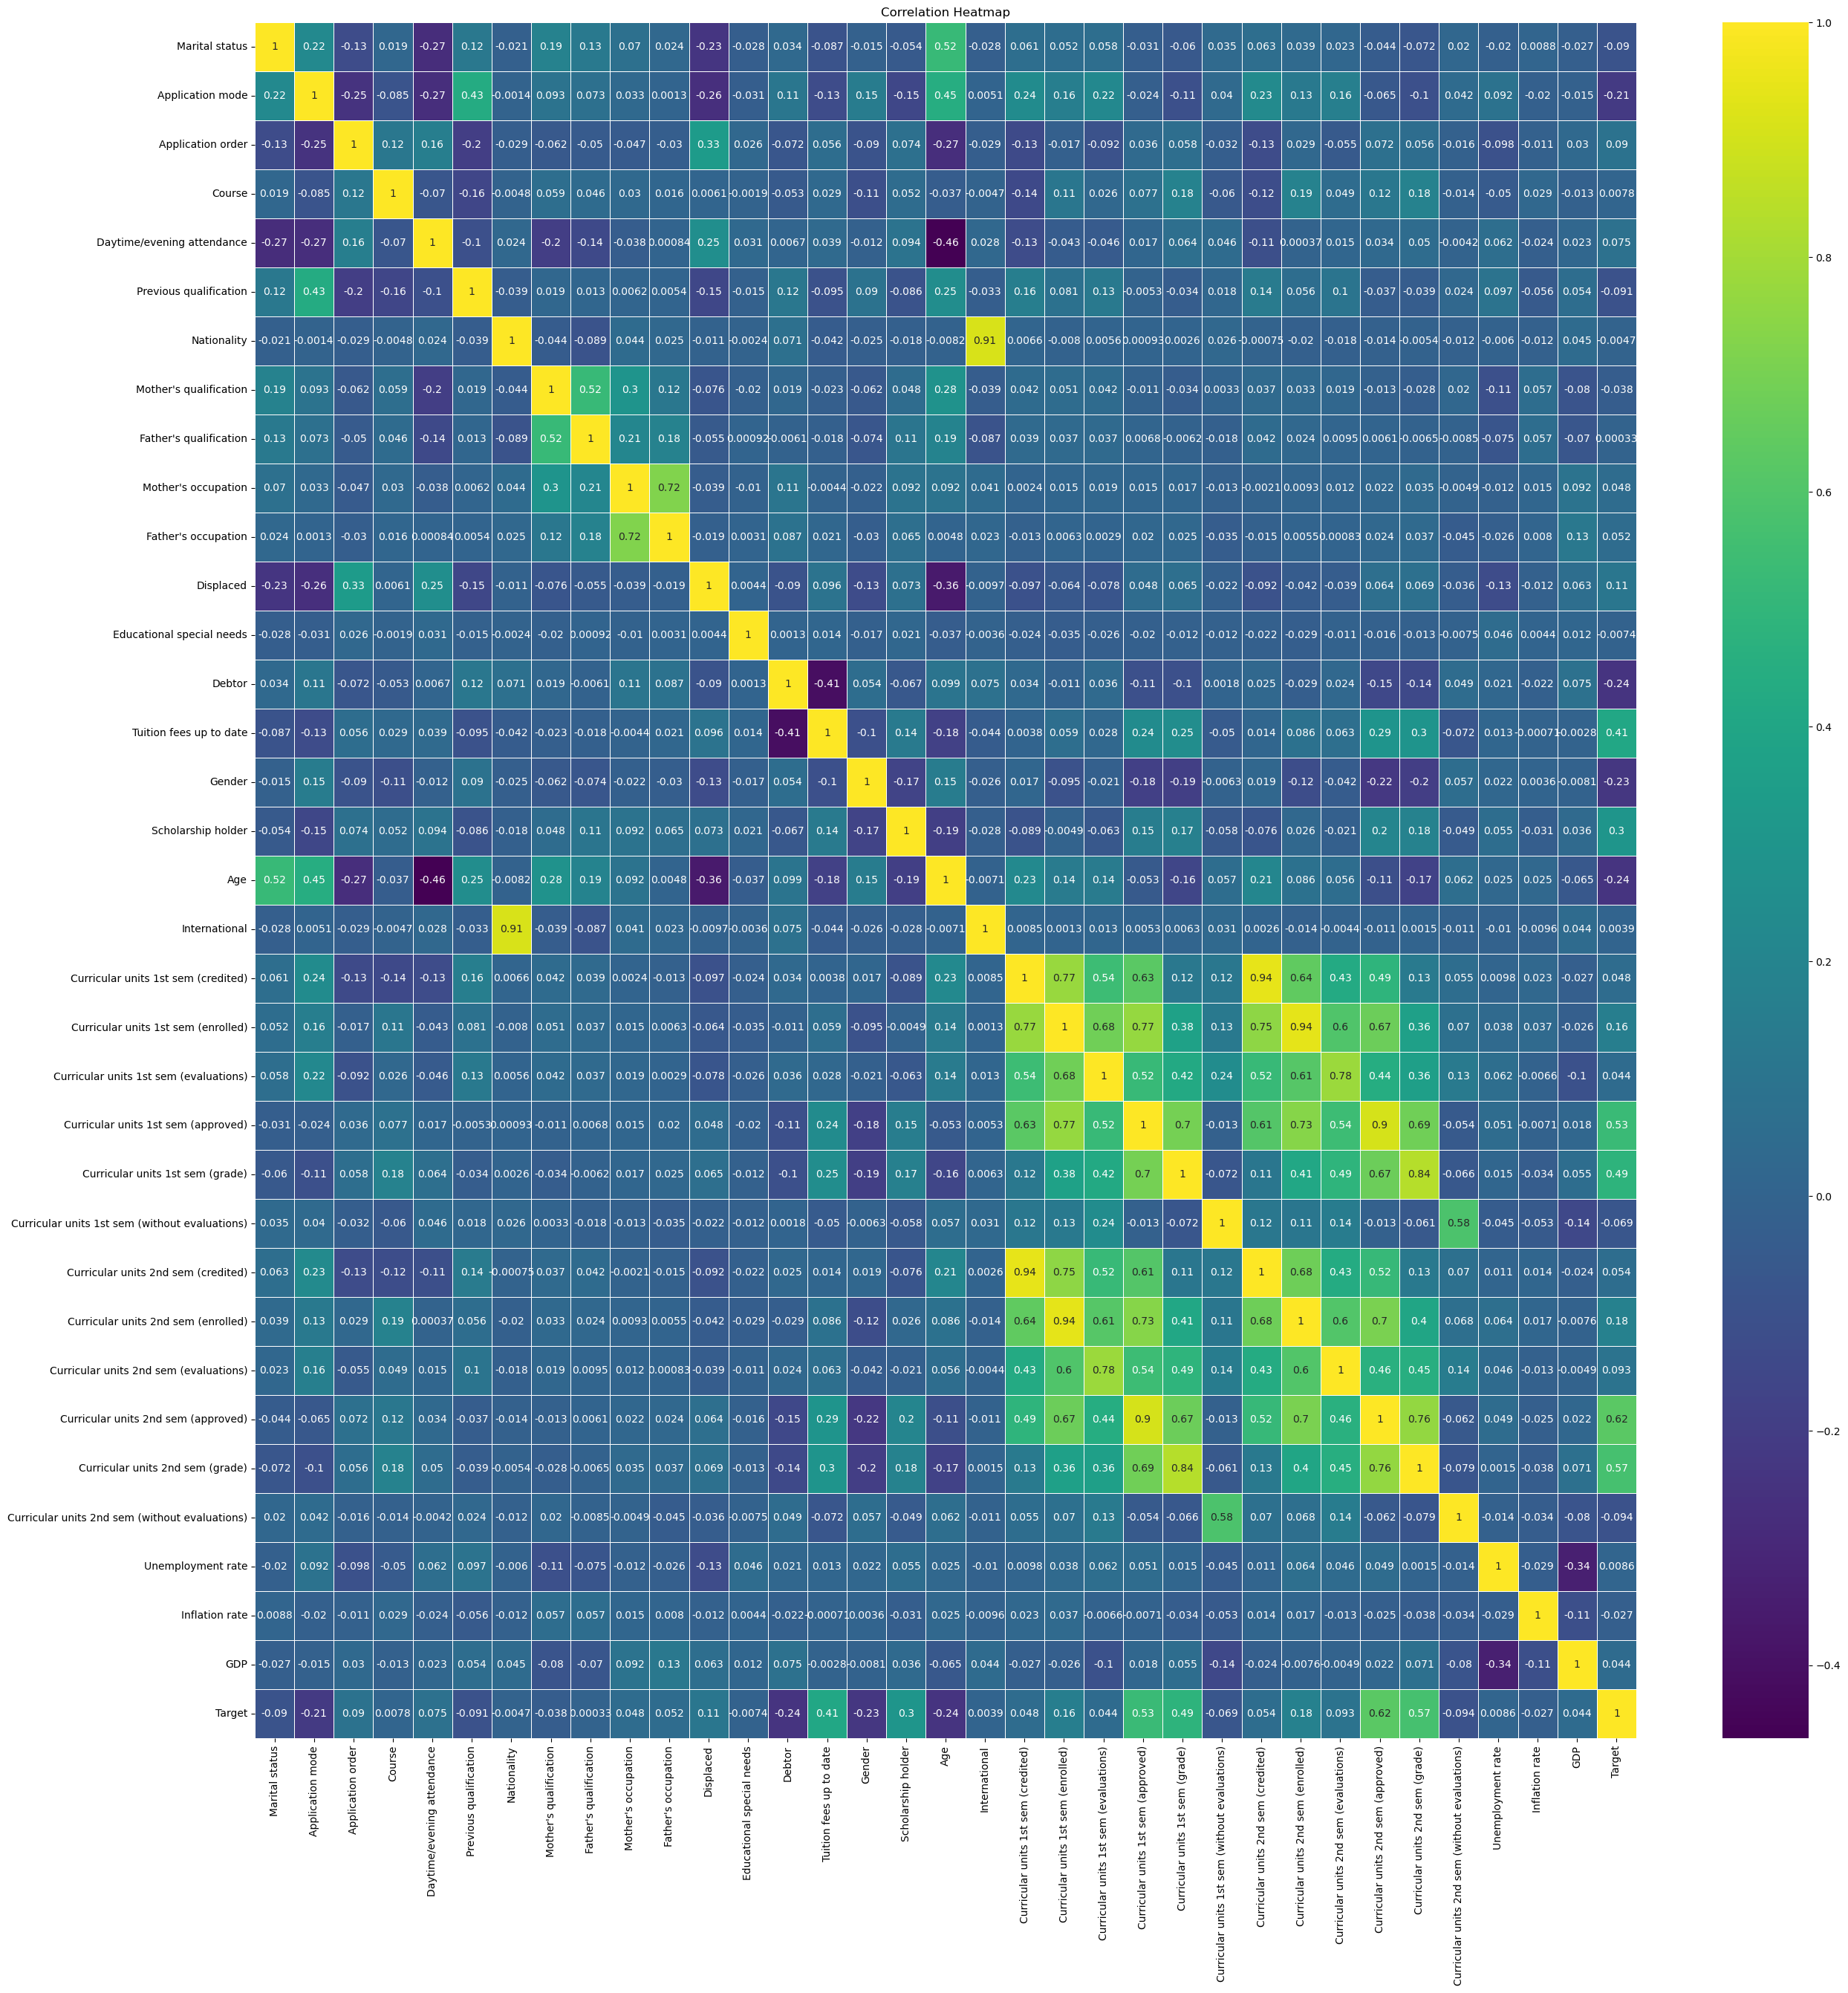

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 30))

# Choose a different colormap for the heatmap. You can select any colormap you like.
cmap = 'viridis'  # Change this to the desired colormap

sns.heatmap(data.corr(), annot=True, cmap=cmap, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [14]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [15]:
new_data['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

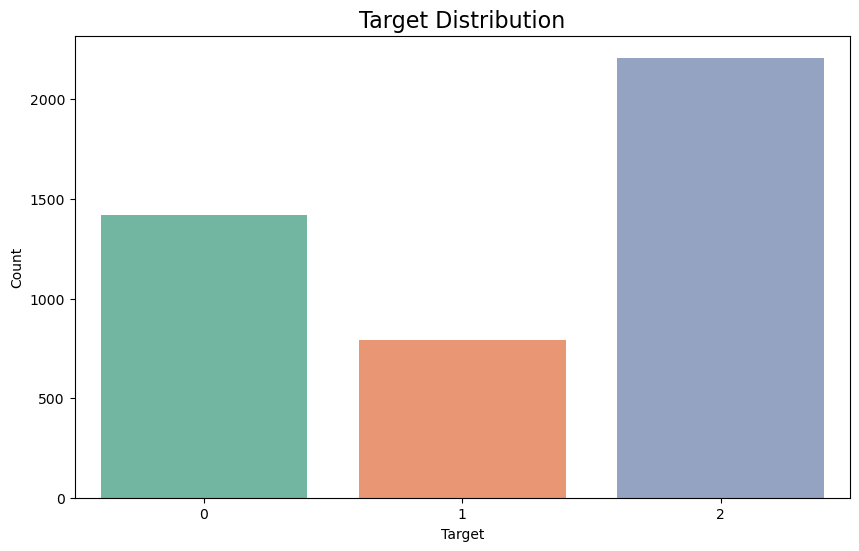

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T': y
})

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Target', y='Count_T', data=df, palette='Set2')
plt.title('Target Distribution', fontsize=16)  # Add a title
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()


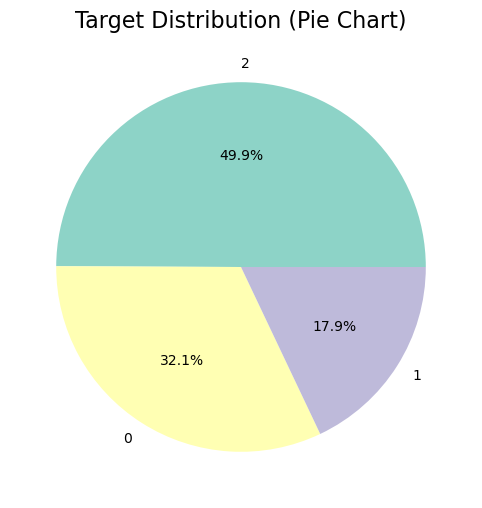

In [18]:
# Create a pie chart using Seaborn
plt.figure(figsize=(12, 6))
plt.pie(y, labels=x, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Target Distribution (Pie Chart)', fontsize=16)

plt.show()

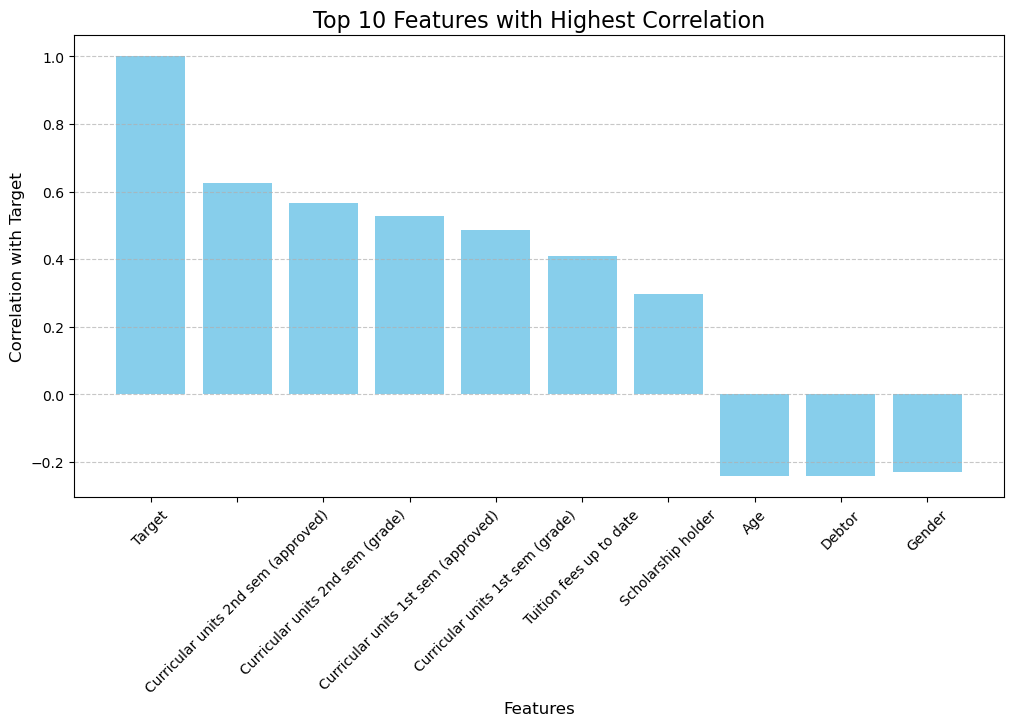

In [19]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

# Define a custom color for the bars
bar_color = 'skyblue'

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(top_10_features, top_10_corr_values, color=bar_color)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Target', fontsize=12)
plt.title('Top 10 Features with Highest Correlation', fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

plt.show()


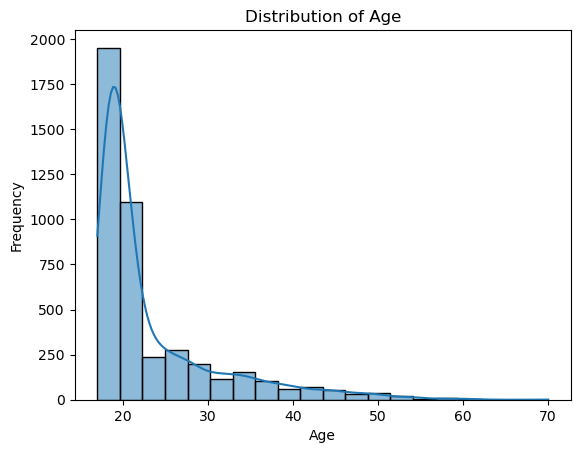

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example histogram for a numerical feature 'Age'
sns.histplot(data['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


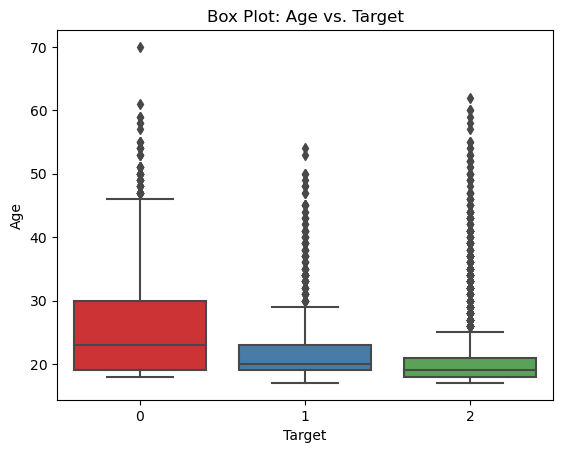

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example box plot for 'Age' vs. 'Target'
sns.boxplot(x='Target', y='Age', data=data, palette='Set1')
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Box Plot: Age vs. Target')
plt.show()



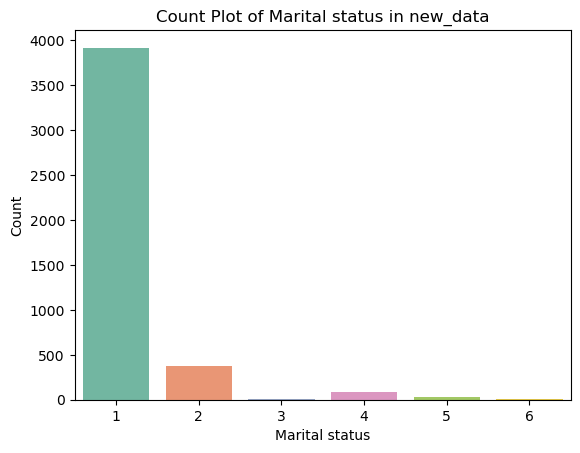

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example count plot for 'Marital status' in new_data
sns.countplot(x='Marital status', data=new_data, palette='Set2')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Count Plot of Marital status in new_data')
plt.show()


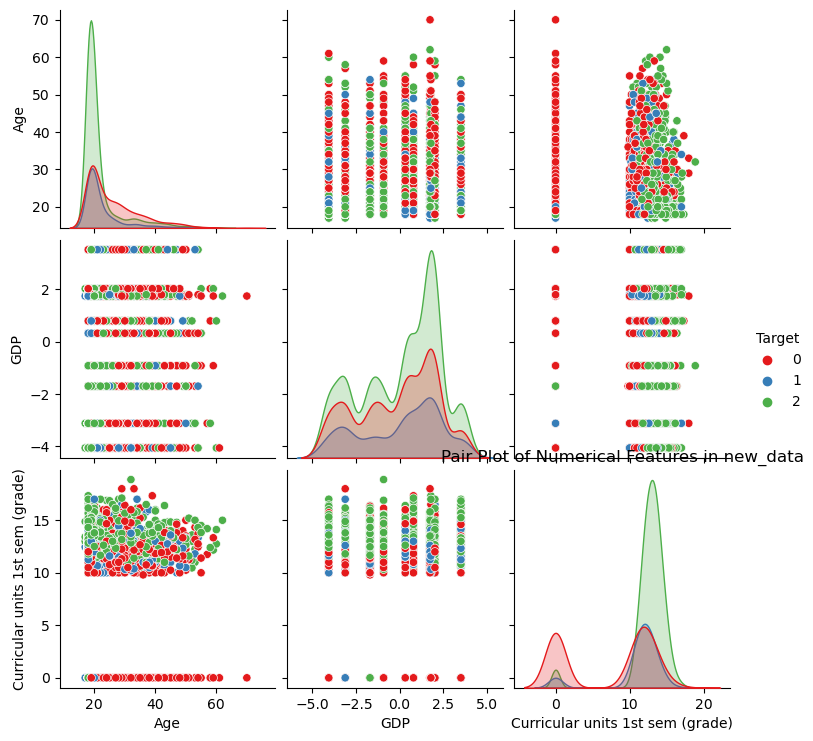

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical features for pair plot
numerical_features = ['Age', 'GDP', 'Curricular units 1st sem (grade)']

# Create a pair plot for new_data with 'Target' as hue
sns.pairplot(data=new_data[numerical_features + ['Target']], hue='Target', palette='Set1')
plt.title('Pair Plot of Numerical Features in new_data')
plt.show()


In [20]:
file_path = "data.csv"

# Save the DataFrame to a CSV file
new_data.to_csv(file_path, index=False)